In [40]:
import pandas as pd

In [41]:
df = pd.read_csv("../datasets/weight_height.csv", encoding="euc-kr")
df

,고유식별번호(ID),최종가중치,학교고유번호(ID),도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,...,키,몸무게,혈당식전(mgdl),총콜레스테롤(mgdl),간기능(AST)단위(UL),간기능(ALT)단위(UL),혈색소(gdl),간염검사,수축기,이완기
0,Aa011남10101,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,125.8,27.3,NaN,NaN,NaN,NaN,NaN,NaN,77.0,58.0
1,Aa011남10102,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,124.3,25.4,NaN,NaN,NaN,NaN,NaN,NaN,83.0,51.0
2,Aa011남10103,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,119.2,23.5,NaN,NaN,NaN,NaN,NaN,NaN,103.0,65.0
3,Aa011남10104,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,115.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,92.0,66.0
4,Aa011남10105,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,120.0,33.5,NaN,NaN,NaN,NaN,NaN,NaN,102.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9681,Ac343남30106,25.790895,Ac34,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,세종과학고등학교,...,176.1,50.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9682,Ac343남30107,25.790895,Ac34,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,세종과학고등학교,...,174.1,88.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9683,Ac343남30108,25.790895,Ac34,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,세종과학고등학교,...,169.5,63.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9684,Ac343여30101,23.325794,Ac34,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,세종과학고등학교,...,159.2,52.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# 몸무게와 학년, 키를 학습시키자.
# 몸무게와 학년으로 키를 예측하자.

# 학년은 1학년부터 ~ 12학년으로 만들자.

In [43]:
df = df[["학교명", "학년", "성별", "키", "몸무게"]]
df["grade"] = list(map(lambda x: 0 if x[-4:] == "초등학교" 
                      else 6 if x[-3:] == "중학교"
                      else 9, df["학교명"])) + df["학년"]
df.drop(["학교명", "학년"], axis='columns', inplace=True)
df.columns = ["gender", "height", "weight", "grade"]
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_11632\2103735169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["grade"] = list(map(lambda x: 0 if x[-4:] == "초등학교"
C:\Users\Admin\AppData\Local\Temp\ipykernel_11632\2103735169.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["학교명", "학년"], axis='columns', inplace=True)


,gender,height,weight,grade
0,남,125.8,27.3,1
1,남,124.3,25.4,1
2,남,119.2,23.5,1
3,남,115.0,20.0,1
4,남,120.0,33.5,1
...,...,...,...,...
9681,남,176.1,50.4,12
9682,남,174.1,88.8,12
9683,남,169.5,63.2,12
9684,여,159.2,52.9,12


In [44]:
# 몸무게와 학년, 키를 학습시키자.
# 몸무게와 학년으로 키를 예측하자.

In [45]:
print(df.isnull().sum())
print(df.isna().sum())

gender    0
height    0
weight    4
grade     0
dtype: int64
gender    0
height    0
weight    4
grade     0
dtype: int64


In [46]:
df.dropna(inplace=True)
df.shape

C:\Users\Admin\AppData\Local\Temp\ipykernel_11632\2053667463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


(9682, 4)

In [47]:
# 1.데이터 준비
gender_condition = df["gender"] == "남"
x = df[gender_condition][["weight", "grade"]]
y = df[gender_condition][["height"]]
# x가 두 개니까 2차원 [[]]   y= x1, x2  +  w1, w2 +b   => w1 *x1 +w2* x2 +b
# 다항식(곡선)을 늘려주겠다 = 꾸불꾸불, 곡선을 많이 주겠다. 그리고 이 말은 차원이 달라진다는 뜻

In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
poly = PolynomialFeatures(degree=3)
poly.fit(x)
x_poly = poly.transform(x)
# 3차 다항식 3제곱 나오니까

In [50]:
poly.get_feature_names_out()
# 복잡한 모델이 됐으니까 내가 표현하는 것을 잘 표현하고 싶어서 PolynomialFeatures 사용

array(['1', 'weight', 'grade', 'weight^2', 'weight grade', 'grade^2',
       'weight^3', 'weight^2 grade', 'weight grade^2', 'grade^3'],
      dtype=object)

In [51]:
#  2.데이터 분할
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3, random_state=1)

In [59]:
# 3. 모델 선택
from sklearn.linear_model import LinearRegression

In [61]:
model = LinearRegression()

In [62]:
#  4. 모델 학습
model.fit(x_train, y_train)

LinearRegression()

In [63]:
#  5. 평가
model.score(x_train, y_train)

0.9223088929555134

In [64]:
#  6. 예측
predict = model.predict(x_test)
# 이산형은 그리기 어렵다.

In [65]:
y_test["predict"] = predict
y_test

,height,predict
4289,158.0,155.559689
9577,169.6,170.353998
639,136.5,142.636031
7826,172.6,175.409300
8532,174.0,174.832055
...,...,...
1766,144.3,147.794236
7625,172.9,174.687727
1367,153.9,159.616252
5963,170.5,169.898377


In [68]:
# 몸무게가 78kg, 학년이 12학년인 
model.predict(poly.transform([[78, 12]]))

C:\Program Files (x86)\ANACONDA3\envs\dsde04\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[174.85447456]])

In [73]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
x_pred = np.linspace(x["weight"].min(),x["weight"].max(), x["weight"].size)

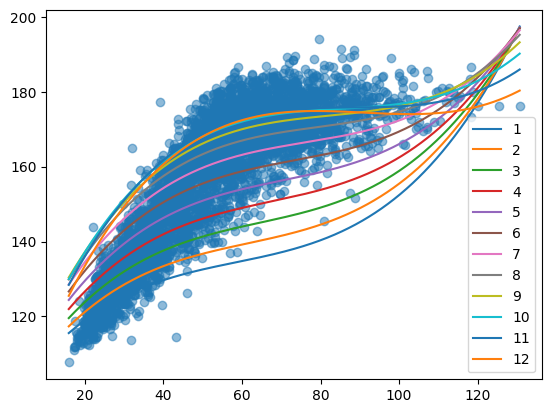

In [76]:
plt.scatter(x["weight"], y["height"], alpha=0.5)
for grade in x["grade"].unique():
    df = pd.DataFrame(x_pred, columns=["weight"])
    df["grade"] = np.full(x_pred.size, grade)
    
    y_pred= model.predict(poly.transform(df))
    
    plt.plot(x_pred, y_pred, label=grade)
    
plt.legend()
plt.show()
# 파란색 = 전체 데이터
# 12개 grade
# 1학년 - 12학년거까지 그려봐라